# PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow

Resources:
* Ground truth notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* Book version of notebook - https://www.learnpytorch.io/01_pytorch_workflow/
* Ask a question - https://github.com/mrdbourke/pytorch-deep-learning/discussions


In [76]:
what_were_covering = {
    1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [77]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.7.1'

## 1. Data (preparing and loading)

Data can be almost anything... in machine learning.
* Excel spreadsheet
* Images of any kind
* Videos (YouTube has lots of data)
* Audio like songs or podcasts
* DNA
* Text

Machine Learning is a game of two parts:
1. Get data into numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with known **parameters**.

In [78]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(1)
y = weight*X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Splitting data into training and test sets
**(one of the most important concepts in machine learning in general)**

Let's create a training and test set with our data

In [79]:
# Create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize!"

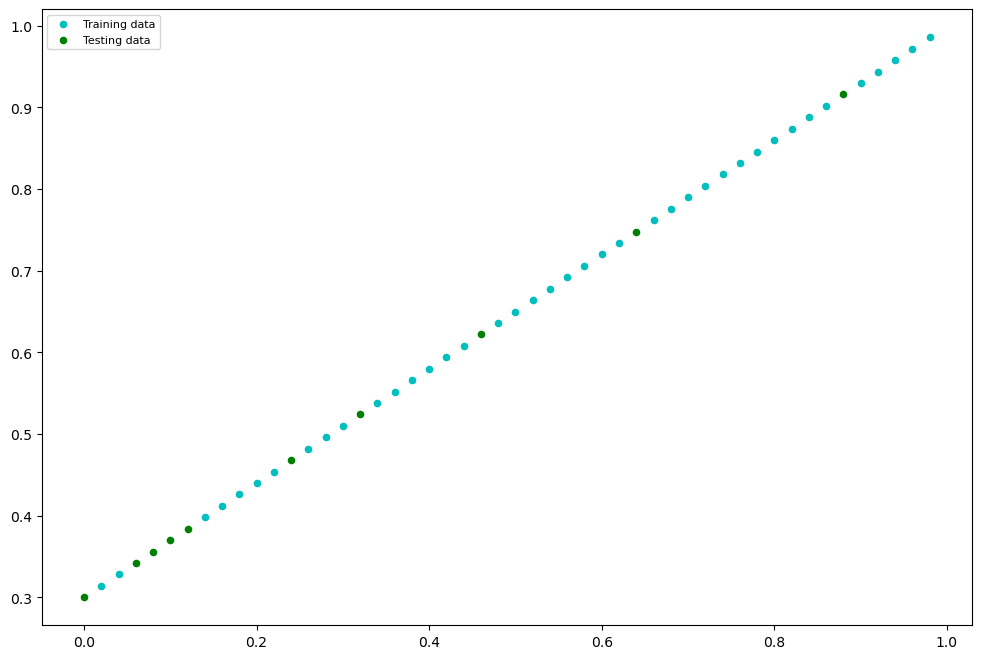

In [80]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data, and compare predictions.
    :param train_data:
    :param train_labels:
    :param test_data:
    :param test_labels:
    :param predictions:
    :return:
    """
    plt.figure(figsize=(12, 8))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="c", s=20, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=20, label="Testing data")

    # Are there predictions?
    if predictions is not None:
        # Plot the predictions if they exist
        plt.scatter(test_data, predictions, c="r", s=20, label="Predictions")

    # Show the legend
    plt.legend(prop={'size': 8})
plot_predictions()

## 2. Build model

Our first PyTorch model!!

What our model does:
* Starty with random values (weight and bias)
* Look at training data and adjust the random values (the weight and bias values we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent - https://youtu.be/lHZwWFHWa-w
2. Backpropagation - https://youtu.be/llg3gGewQ5U

In [81]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
        return x * self.weight + self.bias # this is the linear regression formula

### PyTorch model building essentials

* torch.nn - contains all the buildings for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

See more of these essential modules via PyTorch cheatsheet - https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the contents of our PyTorch model

Now we've created a model, let's see what's inside...

So we can check our model parameters or what's inside our model using `.parameters()`.

In [82]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [83]:
# List named parameters
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run through the `forward()` method.

In [84]:
X_test, y_test

(tensor([[0.1200],
         [0.0800],
         [0.8800],
         [0.0600],
         [0.2400],
         [0.3200],
         [0.1000],
         [0.6400],
         [0.4600],
         [0.0000]]),
 tensor([[0.3840],
         [0.3560],
         [0.9160],
         [0.3420],
         [0.4680],
         [0.5240],
         [0.3700],
         [0.7480],
         [0.6220],
         [0.3000]]))

In [85]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.1692],
        [0.1557],
        [0.4251],
        [0.1490],
        [0.2096],
        [0.2366],
        [0.1625],
        [0.3443],
        [0.2837],
        [0.1288]])

In [86]:
y_test

tensor([[0.3840],
        [0.3560],
        [0.9160],
        [0.3420],
        [0.4680],
        [0.5240],
        [0.3700],
        [0.7480],
        [0.6220],
        [0.3000]])

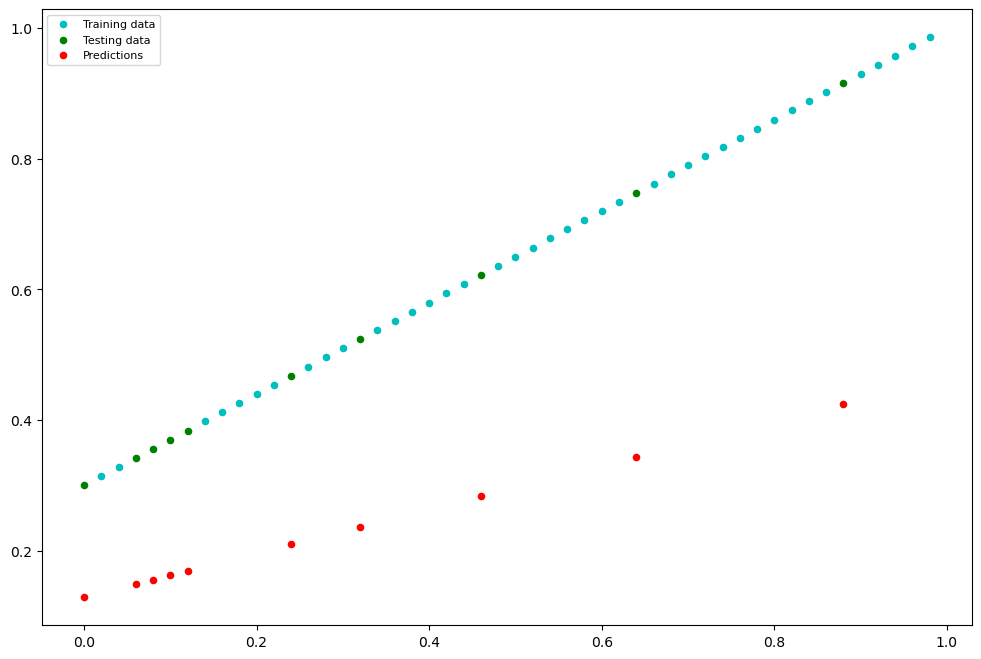

In [87]:
plot_predictions(predictions=y_preds)

See more on inference mode here - https://twitter.com/PyTorch/status/1437838231505096708?s=20&t=cnKav09iTgwQ-rfri6u7PQ

## 3. Train model

The whole idea of training a model is for a model to move from some *unknown* parameters (these may be random) to some known parameters.

Or in other words, from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your model predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer it as a loss function.
* **Loss function:** A function to measure how wrong your model's predictions are to ideal outputs, lower is better.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g., weight & bias)

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [88]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [89]:
# Check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [90]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(model_0.parameters(),
                            lr=0.001) # lr = learning rate = possibly the most important hyperparameter you can set

> **Q:** Which loss function and optimizer should I use?
> **A:** This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.
>
> For example, for a regression problem (like ours), a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.
>
> But for a classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss).

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass prediction to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**Backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient decent**)

In [91]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [92]:
torch.manual_seed(42)

# An epoch is one loop through the data... (this is a hyperparameter because we've set it ourselves)
epochs = 1_500

# Track different values
epoch_count = []
loss_values = []
train_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step() # by default, how the optimizer changes will accumulate through the loop so... we have to zero them above in step 3 for the next iteration of the loop

    ### Testing
    model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/bach norm layers)
    with torch.inference_mode(): # turns off gradient tracking and a couple more things behind the scenes
    # with torch.no_grad(): # you may also see torch.no_grad() in older PyTorch code
        # 1. Do the forward pass
        test_pred = model_0(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    # print what's happening
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss.item())
        train_loss_values.append(test_loss.item())
        print(f"Epoch {epoch} | Loss: {loss} | Test Loss: {test_loss}")
        # print out model state_dict()
        print(model_0.state_dict())

Epoch 0 | Loss: 0.3673778176307678 | Test Loss: 0.2753937840461731
OrderedDict({'weight': tensor([0.3372]), 'bias': tensor([0.1298])})
Epoch 10 | Loss: 0.3544618487358093 | Test Loss: 0.2638278007507324
OrderedDict({'weight': tensor([0.3426]), 'bias': tensor([0.1398])})
Epoch 20 | Loss: 0.34154587984085083 | Test Loss: 0.25226181745529175
OrderedDict({'weight': tensor([0.3480]), 'bias': tensor([0.1498])})
Epoch 30 | Loss: 0.32862991094589233 | Test Loss: 0.2406958043575287
OrderedDict({'weight': tensor([0.3534]), 'bias': tensor([0.1598])})
Epoch 40 | Loss: 0.3157139718532562 | Test Loss: 0.2291298359632492
OrderedDict({'weight': tensor([0.3588]), 'bias': tensor([0.1698])})
Epoch 50 | Loss: 0.3027980327606201 | Test Loss: 0.21756386756896973
OrderedDict({'weight': tensor([0.3642]), 'bias': tensor([0.1798])})
Epoch 60 | Loss: 0.289882093667984 | Test Loss: 0.20599786937236786
OrderedDict({'weight': tensor([0.3696]), 'bias': tensor([0.1898])})
Epoch 70 | Loss: 0.2769661247730255 | Test Lo

In [93]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)
y_preds_new

tensor([[0.3834],
        [0.3554],
        [0.9146],
        [0.3414],
        [0.4673],
        [0.5232],
        [0.3694],
        [0.7468],
        [0.6210],
        [0.2995]])

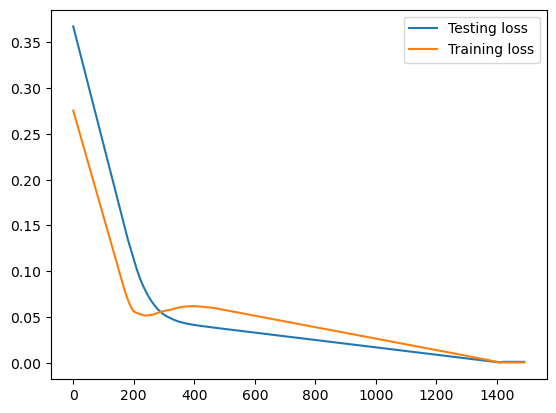

In [99]:
# Plot the loss curves
plt.plot(epoch_count, loss_values, label="Testing loss")
plt.plot(epoch_count, train_loss_values, label="Training loss")
plt.legend()
plt.show()

In [95]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.2995]))])

In [96]:
weight, bias

(0.7, 0.3)

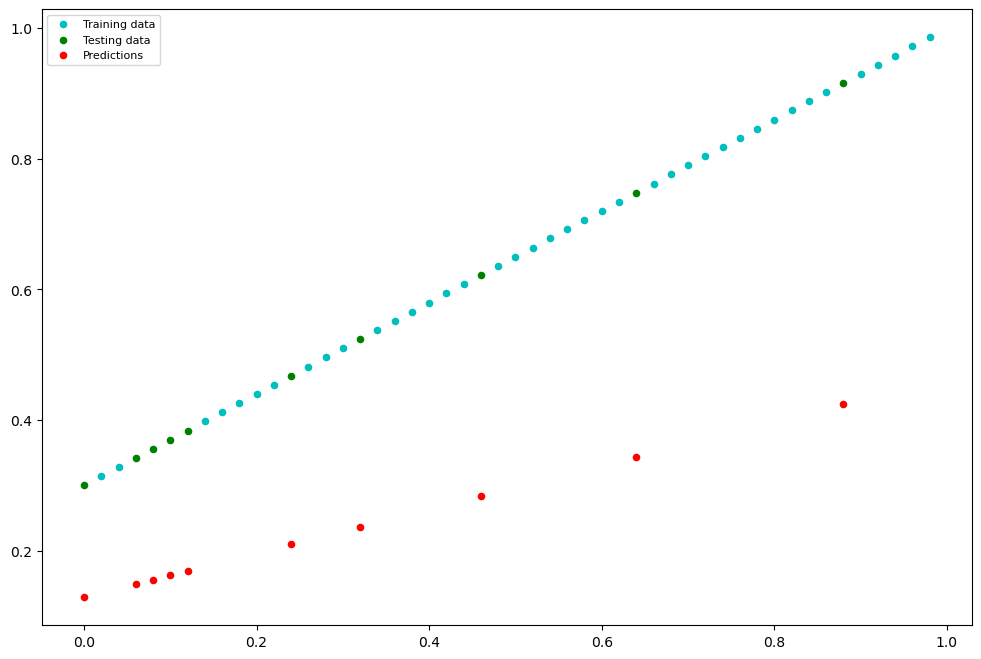

In [97]:
plot_predictions(predictions=y_preds)

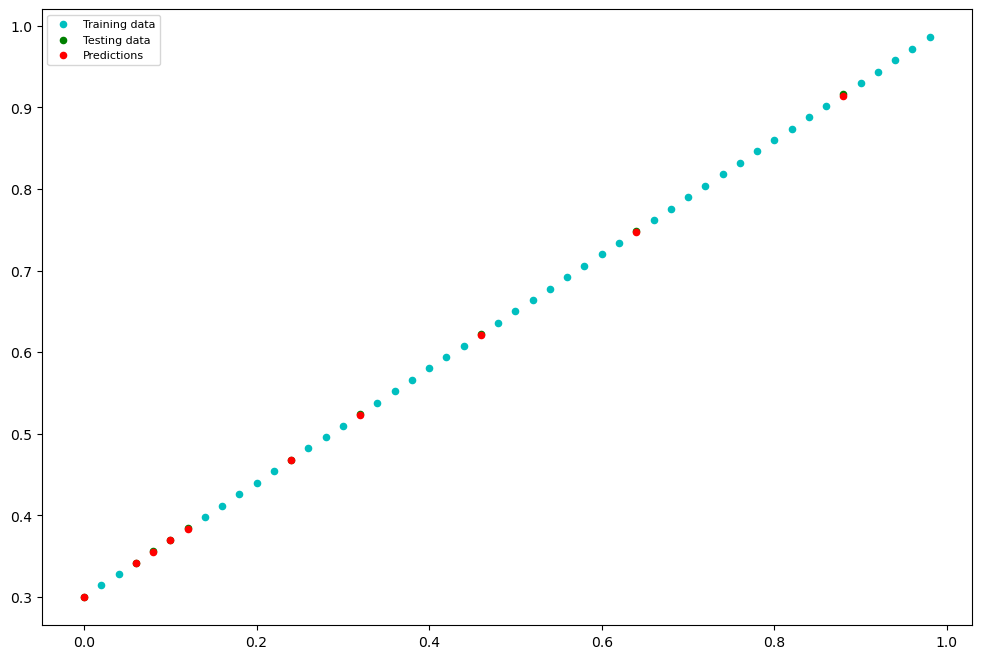

In [98]:
plot_predictions(predictions=y_preds_new)

## Saving a model in PyTorch
There are three main methods you should about for saving and loading models in
PyTorch.
1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict)` - this allows loading a model's saved state dictionary

Pytorch save and load code tutorial and extra-curriculum - https://docs.pytorch.org/tutorials/beginner/saving_loading_models.html

In [101]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create a model save path
MODEL_NAME = "01_pytorch_workflow_video.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

Saving model to models/01_pytorch_workflow_video.pth


total 600
-rw-r--r--@ 1 ridamansour  staff   11978 Jun 29 22:29 00_pytorch_fundamentals_exercises.ipynb
-rw-r--r--@ 1 ridamansour  staff   79479 Jun 29 22:15 00_pytorch_fundimentals.ipynb
-rw-r--r--@ 1 ridamansour  staff  206023 Jul 16 07:34 01_pytorch_workflow_video.ipynb
drwxr-xr-x@ 3 ridamansour  staff      96 Jul 16 07:34 models
-rw-r--r--@ 1 ridamansour  staff       1 Jun 29 07:35 Readme.md
